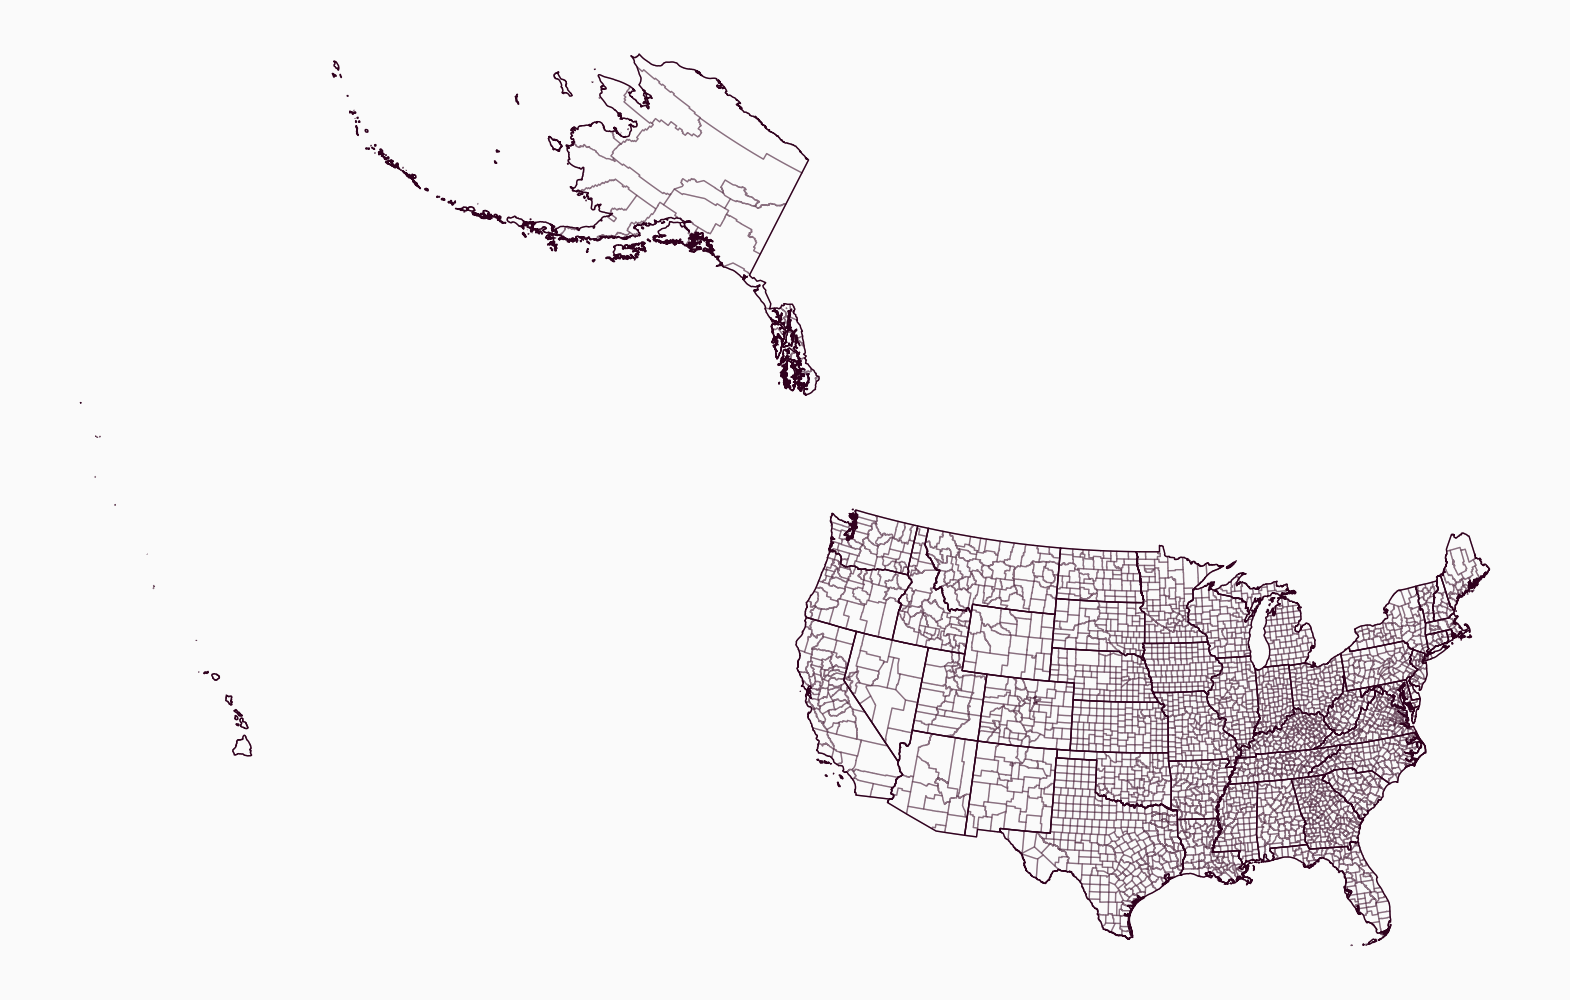

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

edge_color = "#30011E"
background_color = "#fafafa"

sns.set_style({
    "font.family": "serif",
    "figure.facecolor": background_color,
    "axes.facecolor": background_color,
})

counties = gpd.read_file("../data/cb_2018_us_county_500k/")
counties = counties[~counties.STATEFP.isin(["72", "69", "60", "66", "78"])]
counties = counties.set_index("GEOID")

states = gpd.read_file("../data/cb_2018_us_state_500k/")
states = states[~states.STATEFP.isin(["72", "69", "60", "66", "78"])]

counties = counties.to_crs("ESRI:102003")
states = states.to_crs("ESRI:102003")

ax = counties.plot(edgecolor=edge_color + "55", color="None", figsize=(20, 20))
states.plot(ax=ax, edgecolor=edge_color, color="None", linewidth=1)

plt.axis("off")
plt.show()

It’s common to draw Alaska and Hawaii underneath the mainland when drawing data maps of the United States, and that’s what we will do as well.

With geopandas, you can translate, scale, and rotate geometries with built-in functions. Here’s a helpful function to do that.

In [5]:
def translate_geometries(df, x, y, scale, rotate):
    df.loc[:, "geometry"] = df.geometry.translate(yoff=y, xoff=x)
    center = df.dissolve().centroid.iloc[0]
    df.loc[:, "geometry"] = df.geometry.scale(xfact=scale, yfact=scale, origin=center)
    df.loc[:, "geometry"] = df.geometry.rotate(rotate, origin=center)
    return df

I calculate a center point for the entire data frame that defines the origin of rotation and scaling. If I don’t, geopandas does that automatically for each row, which makes the map look completely messed up.

This next function takes our current data frames, separates Hawaii and Alaska, calls translate_geometries() to adjust their geometries, and put them back into new data frames.

In [6]:
def adjust_maps(df):
    df_main_land = df[~df.STATEFP.isin(["02", "15"])]
    df_alaska = df[df.STATEFP == "02"]
    df_hawaii = df[df.STATEFP == "15"]

    df_alaska = translate_geometries(df_alaska, 1300000, -4900000, 0.5, 32)
    df_hawaii = translate_geometries(df_hawaii, 5400000, -1500000, 1, 24)

    return pd.concat([df_main_land, df_alaska, df_hawaii])

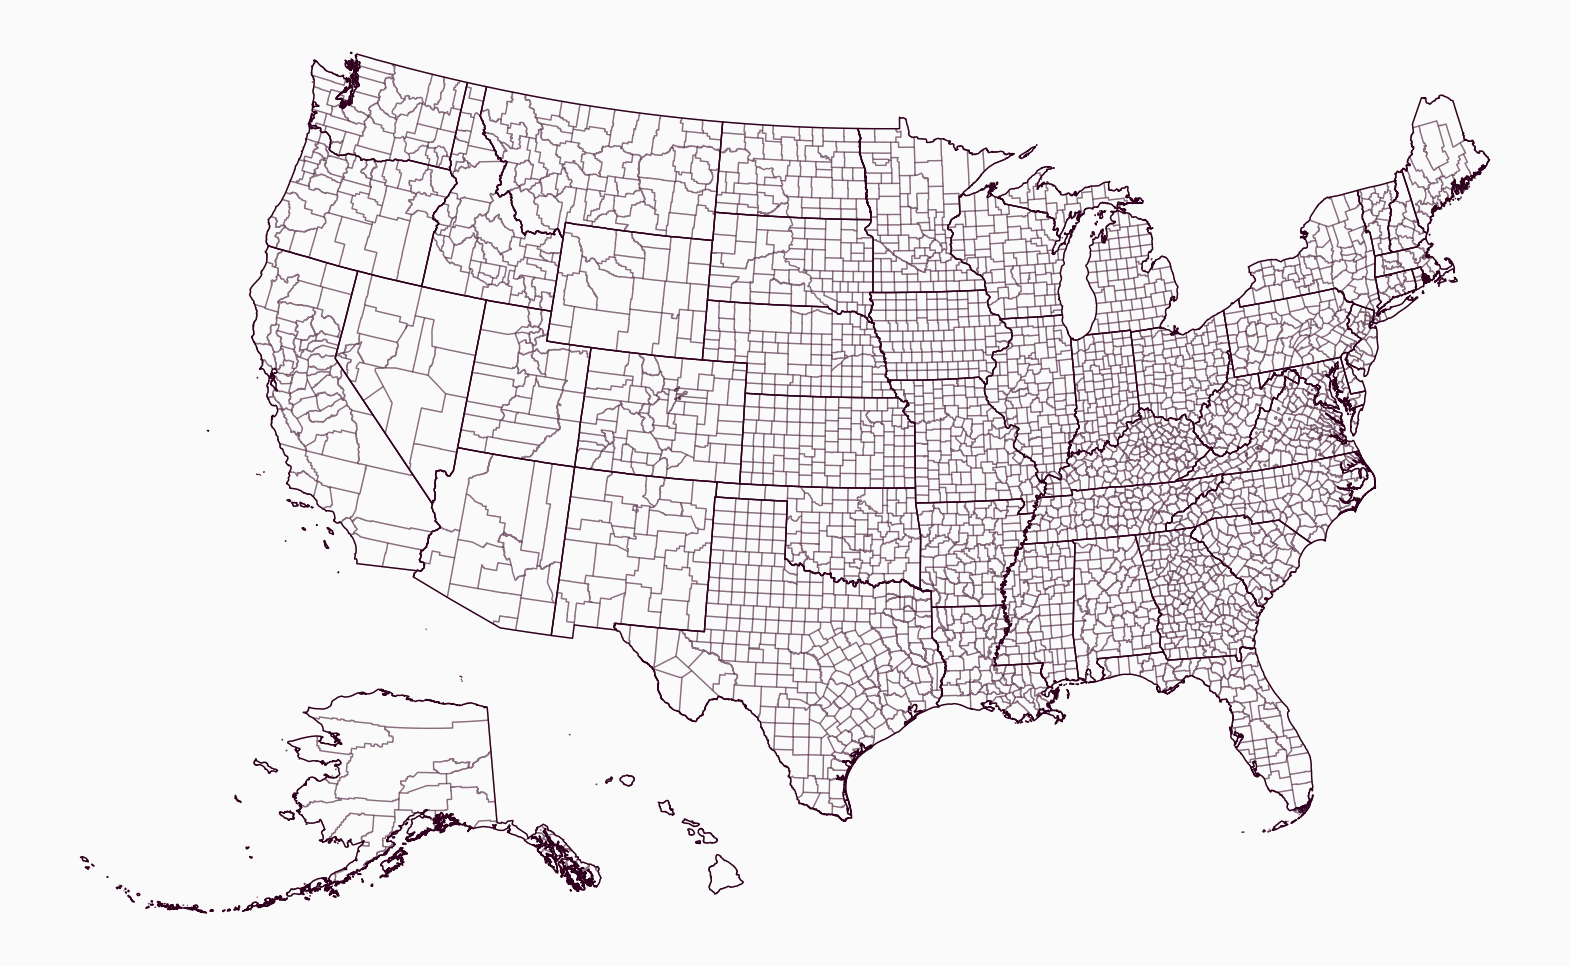

In [11]:
counties = gpd.read_file("../data/cb_2018_us_county_500k/")
counties = counties[~counties.STATEFP.isin(["72", "69", "60", "66", "78"])]
counties = counties.set_index("GEOID")

states = gpd.read_file("../data/cb_2018_us_state_500k/")
states = states[~states.STATEFP.isin(["72", "69", "60", "66", "78"])]

counties = counties.to_crs("ESRI:102003")
states = states.to_crs("ESRI:102003")

counties = adjust_maps(counties)
states = adjust_maps(states)

ax = counties.plot(edgecolor=edge_color + "55", color="None", figsize=(20, 20))
states.plot(ax=ax, edgecolor=edge_color, color="None", linewidth=1)

plt.axis("off")
plt.show()

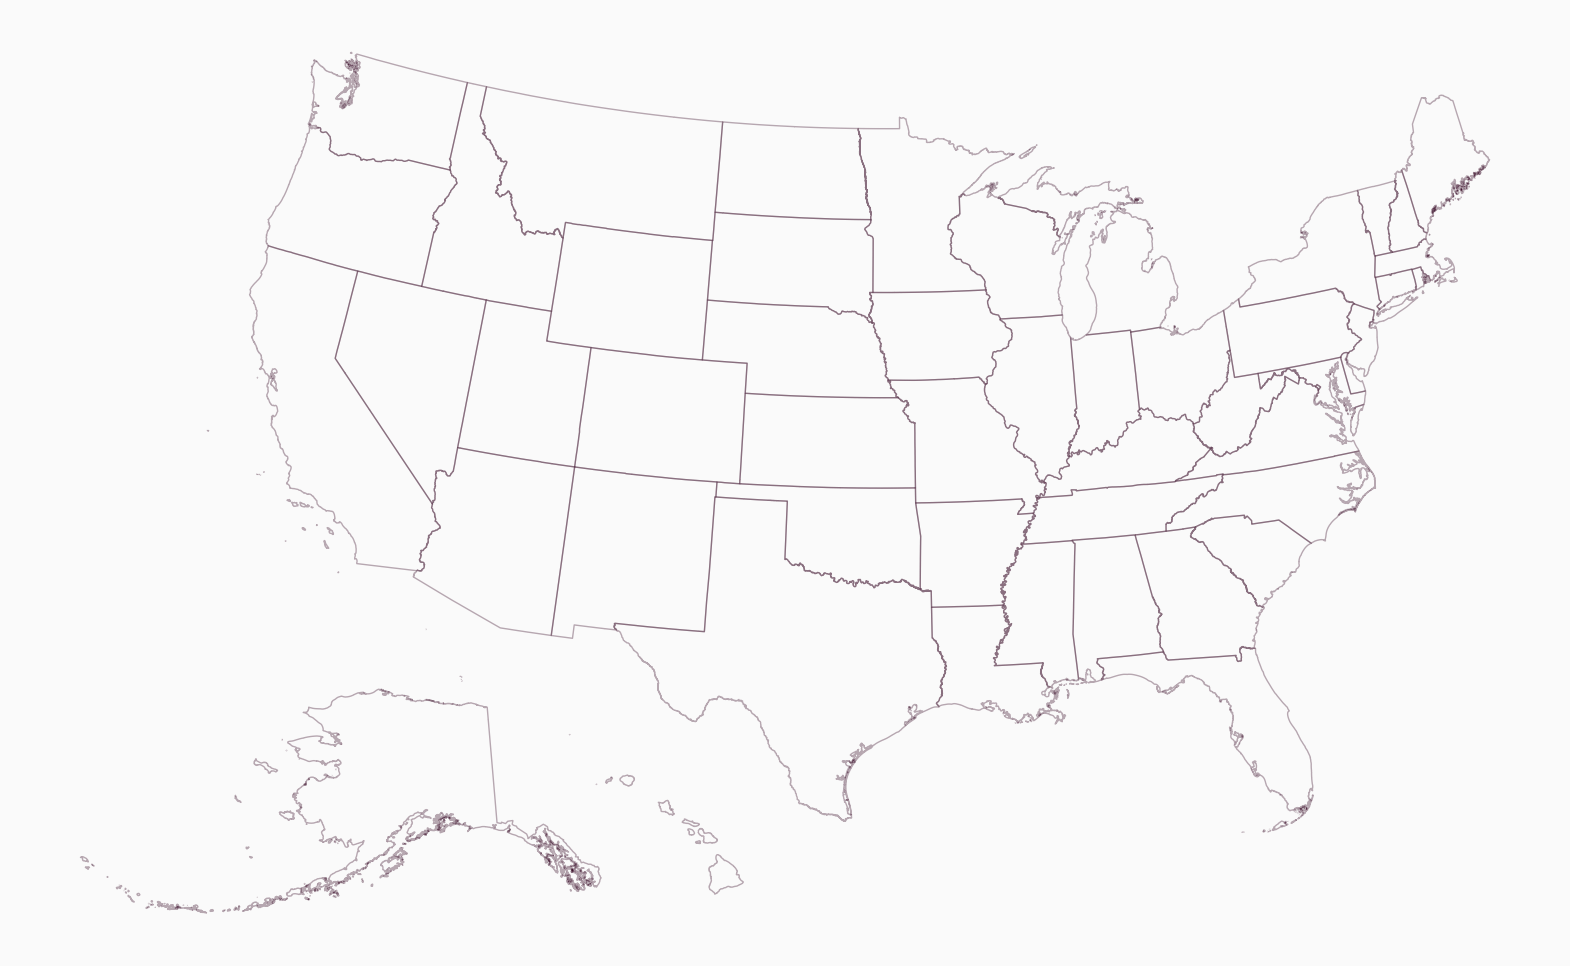

In [12]:
counties = gpd.read_file("../data/cb_2018_us_county_500k/")
counties = counties[~counties.STATEFP.isin(["72", "69", "60", "66", "78"])]
counties = counties.set_index("GEOID")

states = gpd.read_file("../data/cb_2018_us_state_500k/")
states = states[~states.STATEFP.isin(["72", "69", "60", "66", "78"])]

counties = counties.to_crs("ESRI:102003")
states = states.to_crs("ESRI:102003")

counties = adjust_maps(counties)
states = adjust_maps(states)

ax = states.plot(edgecolor=edge_color + "55", color="None", figsize=(20, 20))
# states.plot(ax=ax, edgecolor=edge_color, color="None", linewidth=1)

plt.axis("off")
plt.show()

In [13]:
fires_df = pd.read_json("../data/data.json")

In [14]:
fires_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,FED,FS,BJ8K,FOUNTAIN,2005,2453403.5,33,1300.0,9,Miscellaneous,...,33.0,1730,0.10,A,40.036944,-121.005833,CA,63,63.0,Plumas
1,FED,FS,AAC0,PIGEON,2004,2453137.5,133,845.0,1,Lightning,...,133.0,1530,0.25,A,38.933056,-120.404444,CA,61,61.0,Placer
2,FED,FS,A32W,SLACK,2004,2453156.5,152,1921.0,5,Debris Burning,...,152.0,2024,0.10,A,38.984167,-120.735556,CA,17,17.0,El Dorado
3,FED,FS,None,DEER,2004,2453184.5,180,1600.0,1,Lightning,...,185.0,1400,0.10,A,38.559167,-119.913333,CA,3,3.0,Alpine
4,FED,FS,None,STEVENOT,2004,2453184.5,180,1600.0,1,Lightning,...,185.0,1200,0.10,A,38.559167,-119.933056,CA,3,3.0,Alpine
